# Data Preparation

### Import nessary pakages

In [0]:
from imutils import paths
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt

### Clone dataset

In [2]:
!git clone "https://github.com/mohanrajmit/Image-Read"

Cloning into 'Image-Read'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3056 (delta 0), reused 0 (delta 0), pack-reused 3053
Receiving objects: 100% (3056/3056), 190.63 MiB | 41.41 MiB/s, done.
Resolving deltas: 100% (17/17), done.


### Get image paths

In [3]:
imagePaths = sorted(list(paths.list_images("/content/Image-Read/animals")))
print(imagePaths)
print(len(imagePaths))

['/content/Image-Read/animals/cats/cats_00001.jpg', '/content/Image-Read/animals/cats/cats_00002.jpg', '/content/Image-Read/animals/cats/cats_00003.jpg', '/content/Image-Read/animals/cats/cats_00004.jpg', '/content/Image-Read/animals/cats/cats_00005.jpg', '/content/Image-Read/animals/cats/cats_00006.jpg', '/content/Image-Read/animals/cats/cats_00007.jpg', '/content/Image-Read/animals/cats/cats_00008.jpg', '/content/Image-Read/animals/cats/cats_00009.jpg', '/content/Image-Read/animals/cats/cats_00010.jpg', '/content/Image-Read/animals/cats/cats_00011.jpg', '/content/Image-Read/animals/cats/cats_00012.jpg', '/content/Image-Read/animals/cats/cats_00013.jpg', '/content/Image-Read/animals/cats/cats_00014.jpg', '/content/Image-Read/animals/cats/cats_00015.jpg', '/content/Image-Read/animals/cats/cats_00016.jpg', '/content/Image-Read/animals/cats/cats_00017.jpg', '/content/Image-Read/animals/cats/cats_00018.jpg', '/content/Image-Read/animals/cats/cats_00019.jpg', '/content/Image-Read/animals/c

In [0]:
label_name=["cats","dogs","panda"]

In [0]:
def load_with_features(imagePaths):
  # initialize the list of features and labels
  data = []
  labels = []

  # loop over the input images
  for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label assuming
    # that our path has the following format:
    # /path/to/dataset/{class}/{image}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split("/")[-2]
    (means, stds) = cv2.meanStdDev(image)
    features = np.concatenate([means, stds]).flatten()
    #label = imagePath.split(os.path.sep)[-2]
    #image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)
    data.append(features)
    labels.append(label)

    # show an update every `verbose` images
    #if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
      #print("[INFO] processed {}/{}".format(i + 1,
        #len(imagePaths)))

  # return a tuple of the data and labels
  return (np.array(data), np.array(labels)) 

In [6]:
(data, labels) = load_with_features(imagePaths)
print(data.shape,labels.shape)

(3000, 6) (3000,)


In [7]:
print(data[0])

[70.3800107  76.6351123  83.63931016 50.25804342 42.27292697 40.75369612]


In [0]:
#data = data.reshape((data.shape[0], 96))

# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

In [9]:
print(trainX.shape,trainY.shape)

(2250, 6) (2250,)


In [10]:
# train and evaluate a k-NN classifier on the raw pixel intensities)
print("[INFO] evaluating k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainX, trainY)

[INFO] evaluating k-NN classifier...


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

panda


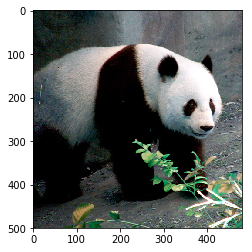

In [11]:
img=cv2.imread("/content/Image-Read/animals/panda/panda_00001.jpg")
#img1=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
(means, stds) = cv2.meanStdDev(img)
features = np.concatenate([means, stds]).flatten()
res= model.predict(features.reshape(1,-1))
print(label_name[int(res)])
plt.imshow(img)

In [12]:
print(classification_report(testY, model.predict(testX),	target_names=le.classes_))

              precision    recall  f1-score   support

        cats       0.46      0.44      0.45       262
        dogs       0.46      0.42      0.44       249
       panda       0.58      0.67      0.62       239

    accuracy                           0.51       750
   macro avg       0.50      0.51      0.50       750
weighted avg       0.50      0.51      0.50       750



# Logistic Regression classification


In [0]:
from sklearn.linear_model import LogisticRegression

In [15]:
model_log = LogisticRegression()
model_log.fit(trainX, trainY)
print(classification_report(testY, model_log.predict(testX),	target_names=le.classes_))

              precision    recall  f1-score   support

        cats       0.52      0.40      0.45       262
        dogs       0.45      0.38      0.41       249
       panda       0.60      0.85      0.70       239

    accuracy                           0.53       750
   macro avg       0.52      0.54      0.52       750
weighted avg       0.52      0.53      0.52       750



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
